<a href="https://colab.research.google.com/github/susanjax/Project_Genetic_Algorithm/blob/main/part_1_remove_outlier_V2_purified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.__version__

'0.11.2'

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/toxicity_project/data/combined_all_purified.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       3241 non-null   int64  
 1   cell line                        3241 non-null   object 
 2   test                             3241 non-null   object 
 3   material                         3241 non-null   object 
 4   time (hr)                        3241 non-null   int64  
 5   concentration (ug/ml)            3241 non-null   float64
 6   viability (%)                    3241 non-null   float64
 7   Hydrodynamic diameter (nm)       3241 non-null   float64
 8   Zeta potential (mV)              3241 non-null   float64
 9   mcd                              3241 non-null   float64
 10  electronegativity                3241 non-null   float64
 11  rox                              3241 non-null   float64
 12  radii               

In [ ]:
df = df.drop(['CID', 'Canonical_smiles', 'BSL' ], axis=1)
df['Valance_electron'] = df['Valance_electron'].astype(float)

In [ ]:
df.isnull().sum().sum()

11

In [ ]:
df2=df.dropna()

In [ ]:
df = df2

In [ ]:
df.columns

Index(['Unnamed: 0', 'cell line', 'test', 'material', 'time (hr)',
       'concentration (ug/ml)', 'viability (%)', 'Hydrodynamic diameter (nm)',
       'Zeta potential (mV)', 'mcd', 'electronegativity', 'rox', 'radii',
       'source', 'Valance_electron', 'amw', 'lipinskiHBA', 'lipinskiHBD',
       'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms',
       'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings',
       'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n',
       'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2',
       'kappa3', 'Phi', 'organism', 'cell type', 'morphology', 'tissue'

In [ ]:
df_imp = df[['time (hr)',
       'concentration (ug/ml)', 'viability (%)', 'Hydrodynamic diameter (nm)',
       'Zeta potential (mV)','mcd', 'electronegativity', 'rox', 'radii',]]

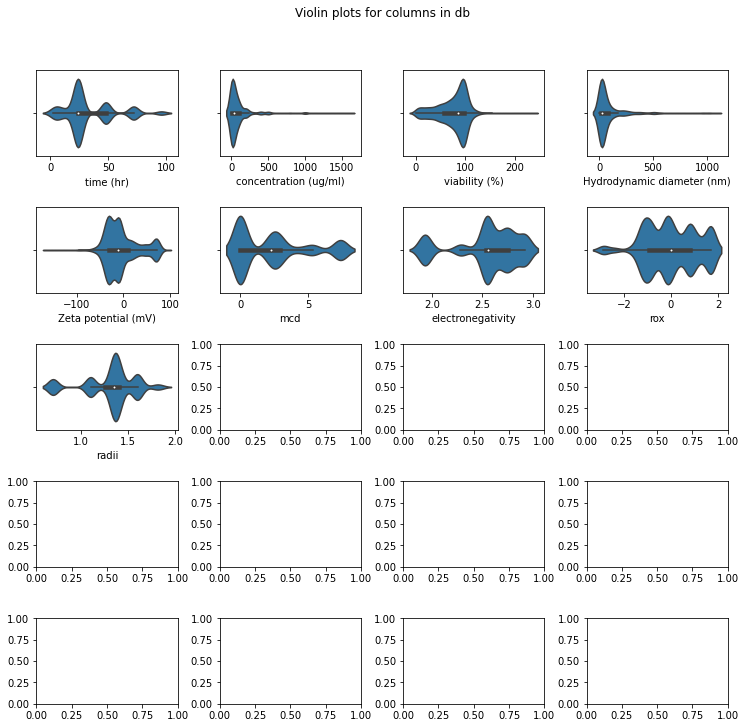

In [ ]:
# violin plots
fig2, ax_ = plt.subplots(5, 4, figsize=(12, 11))
ax = []
for i in ax_:
    ax += i.tolist()
for number, column in enumerate(df_imp.columns):
    sns.violinplot(data=df_imp, x=column, ax=ax[number])
fig2.suptitle("Violin plots for columns in db")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.6)
plt.show()

### remove outliers

removing 1% of the data from the end where data are widely spread

In [ ]:
df.describe()

,Unnamed: 0,time (hr),concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,electronegativity,rox,radii,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
count,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,...,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000
mean,1619.761610,32.603715,93.005364,75.458820,86.299098,-5.131515,2.269989,2.546653,-0.010365,1.317399,...,1.094490,0.253977,0.006244,0.006244,0.001274,0.472035,6.258459,4.518064,170.858308,56.483518
std,937.323989,21.204214,174.903137,30.164488,146.297572,36.074161,2.605168,0.310675,1.115644,0.270755,...,0.940235,0.305762,0.015881,0.015881,0.003242,0.408215,22.267601,13.403603,1028.470818,427.670686
min,0.000000,2.000000,0.000000,0.000000,1.150000,-158.000000,0.000000,1.900000,-2.866000,0.700000,...,0.301511,0.000000,0.000000,0.000000,0.000000,-0.200260,0.000000,0.000000,0.000000,0.000000
25%,807.250000,24.000000,5.000000,57.581500,18.000000,-31.700000,0.000000,2.540000,-0.930000,1.250000,...,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,1.740260,0.091137,1.816883,0.158602
50%,1614.500000,24.000000,30.000000,85.069500,30.000000,-10.700000,2.272727,2.550000,0.000000,1.350000,...,0.724476,0.123091,0.000000,0.000000,0.000000,0.688312,2.319481,1.319481,2.143769,1.530255
75%,2432.750000,48.000000,100.000000,96.975100,82.730000,11.000000,2.932551,2.750000,0.799600,1.400000,...,1.316497,0.408248,0.000000,0.000000,0.000000,0.740260,3.314286,2.314286,2.499632,2.556735
max,3240.000000,96.000000,1600.000000,234.630000,1073.500000,88.000000,7.407407,2.926667,1.692000,1.850000,...,4.234527,1.263710,0.066667,0.066667,0.013608,1.359481,244.978309,161.043969,6541.990841,5636.039883


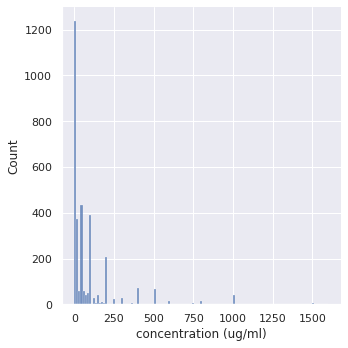

In [ ]:
sns.displot(data=df, x='concentration (ug/ml)', kind='hist')

In [ ]:
q = df["concentration (ug/ml)"].quantile(0.99)
q

1000.0

In [ ]:
df2 = df[df['concentration (ug/ml)']<1001]

# df2.describe()

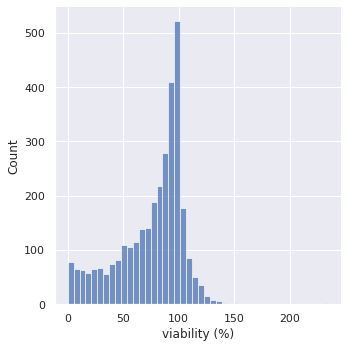

In [ ]:
sns.displot(data=df2, x='viability (%)', kind='hist')

In [ ]:
q = df["viability (%)"].quantile(0.99)
q

126.18400000000001

In [ ]:
df3 = df2[df2['viability (%)']< 126.34]

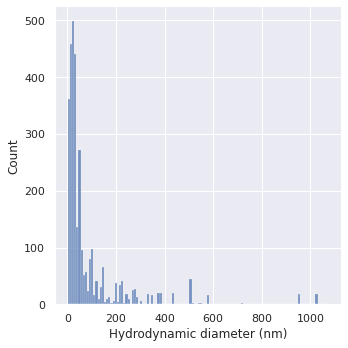

In [ ]:
sns.displot(data=df3, x='Hydrodynamic diameter (nm)', kind='hist')

In [ ]:
q = df3["Hydrodynamic diameter (nm)"].quantile(0.99)
q

957.0

In [ ]:
df4 = df3[df3['Hydrodynamic diameter (nm)']< 801]

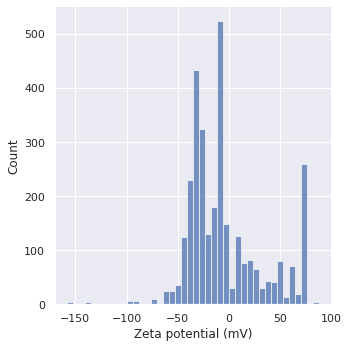

In [ ]:
sns.displot(data=df4, x='Zeta potential (mV)', kind='hist')

In [ ]:
q = df["Zeta potential (mV)"].quantile(0.01)
q

-67.75

In [ ]:
df5 = df4[df4['Zeta potential (mV)']>-65]

In [ ]:
df5

,Unnamed: 0,cell line,test,material,time (hr),concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,...,hallKierAlpha,kappa1,kappa2,kappa3,Phi,organism,cell type,morphology,tissue,disease
0,0,143B,MTT,Au,4,200.0,36.126,50.00,-4.65,0.000000,...,0.740260,1.740260,0.091137,2.143769,0.158602,Human,Human,mix,bone,osteosarcoma
1,1,143B,MTT,Au,4,400.0,22.253,50.00,-33.33,0.000000,...,0.740260,1.740260,0.091137,2.143769,0.158602,Human,Human,mix,bone,osteosarcoma
2,2,143B,MTT,Au,4,500.0,19.643,50.00,-31.30,0.000000,...,0.740260,1.740260,0.091137,2.143769,0.158602,Human,Human,mix,bone,osteosarcoma
3,3,143B,MTT,Au,72,1.0,91.262,189.25,-16.95,0.000000,...,0.740260,1.740260,0.091137,2.143769,0.158602,Human,Human,mix,bone,osteosarcoma
4,4,143B,MTT,Au,72,3.0,87.500,444.90,29.45,0.000000,...,0.740260,1.740260,0.091137,2.143769,0.158602,Human,Human,mix,bone,osteosarcoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,3236,neuro2A,MTT,CeO2,48,50.0,63.246,5.00,-40.50,3.960396,...,0.976623,3.976623,2.976623,2.976623,3.945637,mouse,Animal,neuroblast,brain,Neuroblastoma
3237,3237,neuro2A,MTT,CeO2,48,50.0,102.630,10.00,-8.00,3.960396,...,0.976623,3.976623,2.976623,2.976623,3.945637,mouse,Animal,neuroblast,brain,Neuroblastoma
3238,3238,neuro2A,MTT,CeO2,48,50.0,107.880,20.00,31.38,3.960396,...,0.976623,3.976623,2.976623,2.976623,3.945637,mouse,Animal,neuroblast,brain,Neuroblastoma
3239,3239,neuro2A,MTT,CeO2,48,50.0,106.440,40.00,-8.72,3.960396,...,0.976623,3.976623,2.976623,2.976623,3.945637,mouse,Animal,neuroblast,brain,Neuroblastoma


In [ ]:
df_imp = df5[['time (hr)',
       'concentration (ug/ml)', 'viability (%)', 'Hydrodynamic diameter (nm)',
       'Zeta potential (mV)', 'mcd', 'electronegativity', 'rox', 'radii',]]

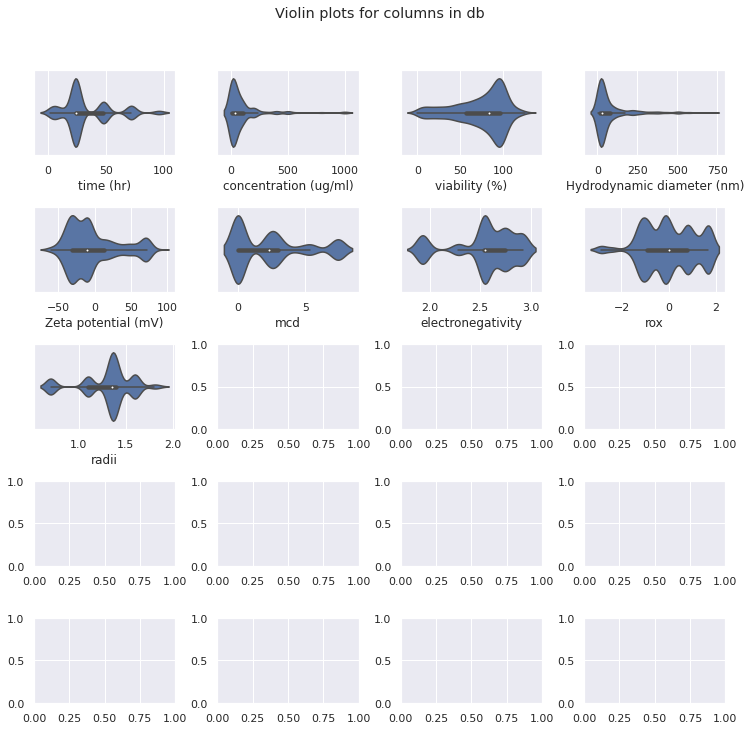

In [ ]:
# violin plots
fig2, ax_ = plt.subplots(5, 4, figsize=(12, 11))
ax = []
for i in ax_:
    ax += i.tolist()
for number, column in enumerate(df_imp.columns):
    sns.violinplot(data=df_imp, x=column, ax=ax[number])
fig2.suptitle("Violin plots for columns in db")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.6)
plt.show()

In [ ]:
# df5.to_csv('removed_outliers.csv')
#outliers_removed

##remove low variance values using variance threshold 

In [ ]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

separating categorical and numerical values

In [ ]:
dff5=df5.select_dtypes(include=['float64'])
dff5o = df5.select_dtypes(include=['object'])

In [ ]:
dff5.columns

Index(['concentration (ug/ml)', 'viability (%)', 'Hydrodynamic diameter (nm)',
       'Zeta potential (mV)', 'mcd', 'electronegativity', 'rox', 'radii',
       'Valance_electron', 'amw', 'lipinskiHBA', 'lipinskiHBD',
       'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms',
       'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings',
       'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n',
       'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2',
       'kappa3', 'Phi'],
      dtype='object')

In [ ]:
df6 = variance_threshold(dff5, 0)
df6

,concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,electronegativity,rox,radii,Valance_electron,amw,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,200.0,36.126,50.00,-4.65,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.301511,0.000000,0.0,0.0,0.0,0.740260,1.740260,0.091137,2.143769,0.158602
1,400.0,22.253,50.00,-33.33,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.301511,0.000000,0.0,0.0,0.0,0.740260,1.740260,0.091137,2.143769,0.158602
2,500.0,19.643,50.00,-31.30,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.301511,0.000000,0.0,0.0,0.0,0.740260,1.740260,0.091137,2.143769,0.158602
3,1.0,91.262,189.25,-16.95,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.301511,0.000000,0.0,0.0,0.0,0.740260,1.740260,0.091137,2.143769,0.158602
4,3.0,87.500,444.90,29.45,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.301511,0.000000,0.0,0.0,0.0,0.740260,1.740260,0.091137,2.143769,0.158602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,50.0,63.246,5.00,-40.50,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,1.316497,0.408248,0.0,0.0,0.0,0.976623,3.976623,2.976623,2.976623,3.945637
3237,50.0,102.630,10.00,-8.00,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,1.316497,0.408248,0.0,0.0,0.0,0.976623,3.976623,2.976623,2.976623,3.945637
3238,50.0,107.880,20.00,31.38,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,1.316497,0.408248,0.0,0.0,0.0,0.976623,3.976623,2.976623,2.976623,3.945637
3239,50.0,106.440,40.00,-8.72,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,1.316497,0.408248,0.0,0.0,0.0,0.976623,3.976623,2.976623,2.976623,3.945637


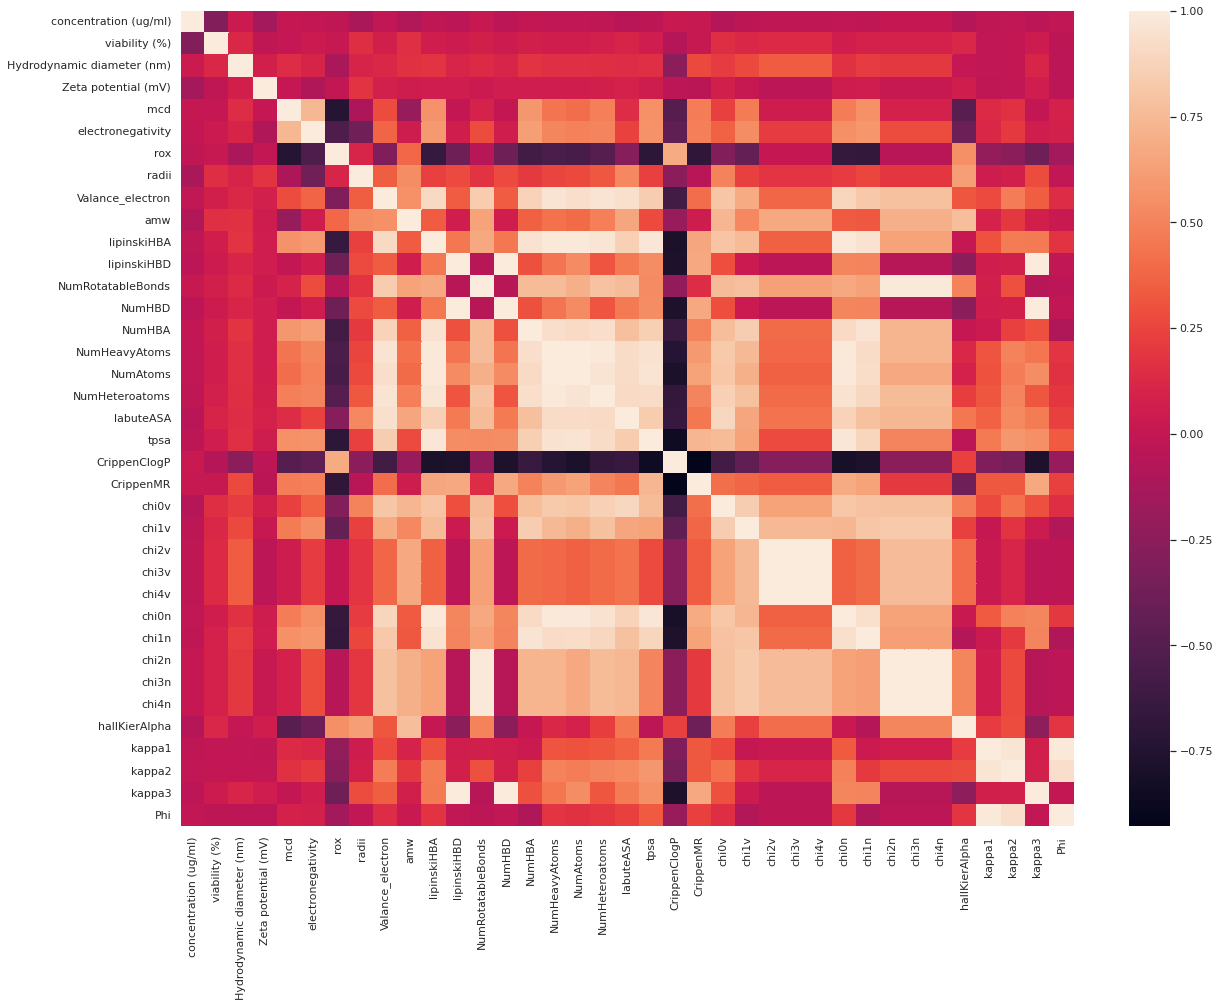

In [ ]:
sns.heatmap(df6.corr())
sns.set(rc={'figure.figsize':(20,15)})

In [ ]:
df7 = variance_threshold(dff5, 0.8*(1-0.8))
df7

,concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,rox,Valance_electron,amw,lipinskiHBA,NumRotatableBonds,...,chi0v,chi1v,chi2v,chi3v,chi0n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,200.0,36.126,50.00,-4.65,0.000000,1.692,11.0,196.967,0.0,0.0,...,2.467977,0.000000,0.0,0.0,0.301511,0.740260,1.740260,0.091137,2.143769,0.158602
1,400.0,22.253,50.00,-33.33,0.000000,1.692,11.0,196.967,0.0,0.0,...,2.467977,0.000000,0.0,0.0,0.301511,0.740260,1.740260,0.091137,2.143769,0.158602
2,500.0,19.643,50.00,-31.30,0.000000,1.692,11.0,196.967,0.0,0.0,...,2.467977,0.000000,0.0,0.0,0.301511,0.740260,1.740260,0.091137,2.143769,0.158602
3,1.0,91.262,189.25,-16.95,0.000000,1.692,11.0,196.967,0.0,0.0,...,2.467977,0.000000,0.0,0.0,0.301511,0.740260,1.740260,0.091137,2.143769,0.158602
4,3.0,87.500,444.90,29.45,0.000000,1.692,11.0,196.967,0.0,0.0,...,2.467977,0.000000,0.0,0.0,0.301511,0.740260,1.740260,0.091137,2.143769,0.158602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,50.0,63.246,5.00,-40.50,3.960396,-0.870,16.0,172.114,2.0,0.0,...,4.456552,2.972092,0.0,0.0,1.316497,0.976623,3.976623,2.976623,2.976623,3.945637
3237,50.0,102.630,10.00,-8.00,3.960396,-0.870,16.0,172.114,2.0,0.0,...,4.456552,2.972092,0.0,0.0,1.316497,0.976623,3.976623,2.976623,2.976623,3.945637
3238,50.0,107.880,20.00,31.38,3.960396,-0.870,16.0,172.114,2.0,0.0,...,4.456552,2.972092,0.0,0.0,1.316497,0.976623,3.976623,2.976623,2.976623,3.945637
3239,50.0,106.440,40.00,-8.72,3.960396,-0.870,16.0,172.114,2.0,0.0,...,4.456552,2.972092,0.0,0.0,1.316497,0.976623,3.976623,2.976623,2.976623,3.945637


In [ ]:
# df7.corr()

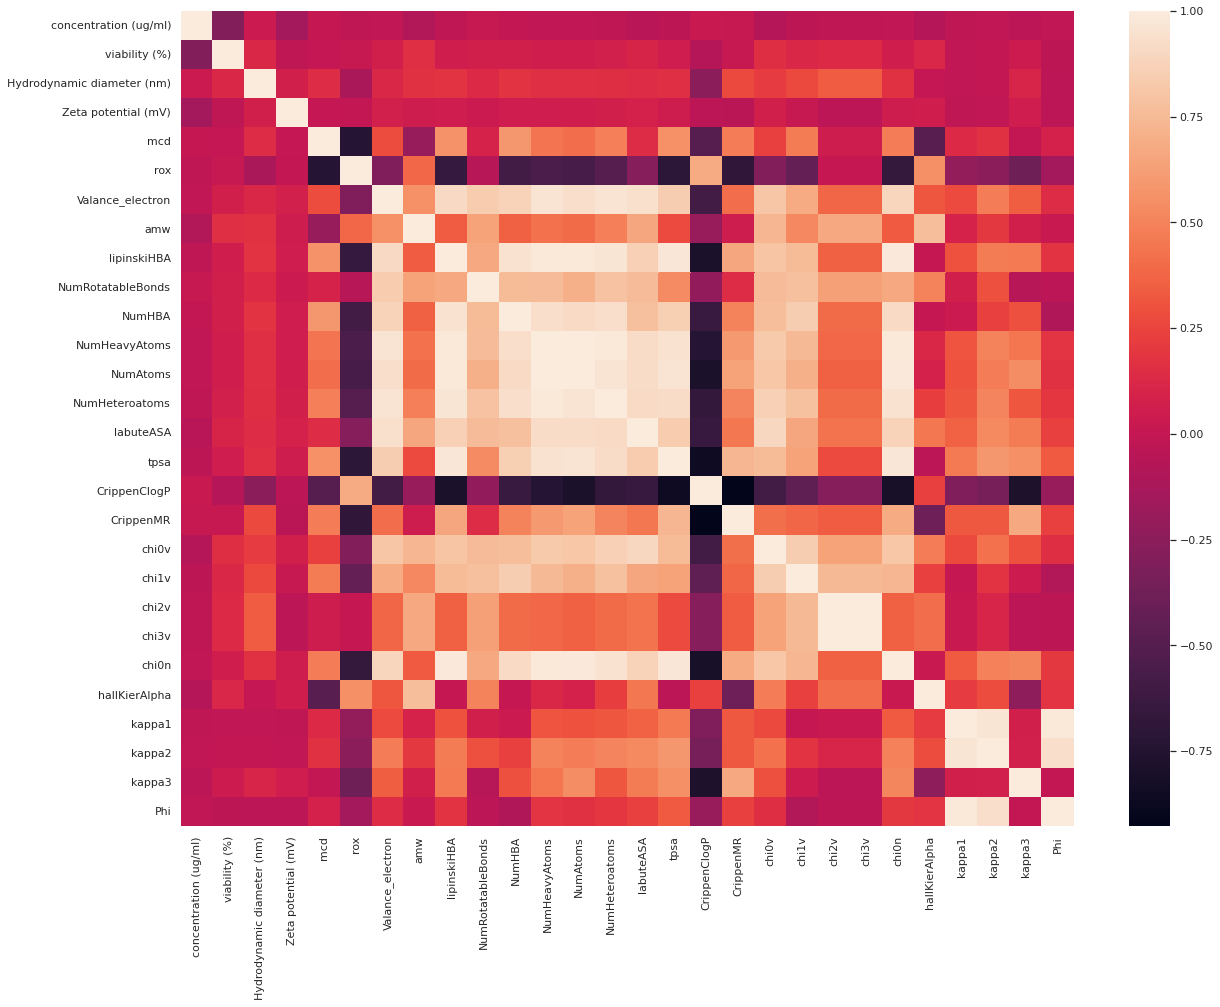

In [ ]:
sns.heatmap(df7.corr())
sns.set(rc={'figure.figsize':(20,15)})

##remove highly corelated columns

In [ ]:
def corr(df, val):
  corr_matrix = df.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  to_drop = [column for column in upper.columns if any(upper[column] > val)]
  return df.drop(to_drop, axis=1, inplace=True)



In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = df6.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df6.drop(to_drop, axis=1, inplace=True)

<ipython-input-47-6251441f22a0>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
corr(df6, 0.95)
df6

<ipython-input-46-cca96b09520e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,electronegativity,rox,radii,Valance_electron,amw,...,NumRotatableBonds,NumHBA,labuteASA,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,hallKierAlpha,kappa1
0,200.0,36.126,50.00,-4.65,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
1,400.0,22.253,50.00,-33.33,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
2,500.0,19.643,50.00,-31.30,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
3,1.0,91.262,189.25,-16.95,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
4,3.0,87.500,444.90,29.45,0.000000,2.540000,1.692,1.35,11.0,196.967,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,50.0,63.246,5.00,-40.50,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623
3237,50.0,102.630,10.00,-8.00,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623
3238,50.0,107.880,20.00,31.38,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623
3239,50.0,106.440,40.00,-8.72,3.960396,2.666667,-0.870,1.85,16.0,172.114,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623


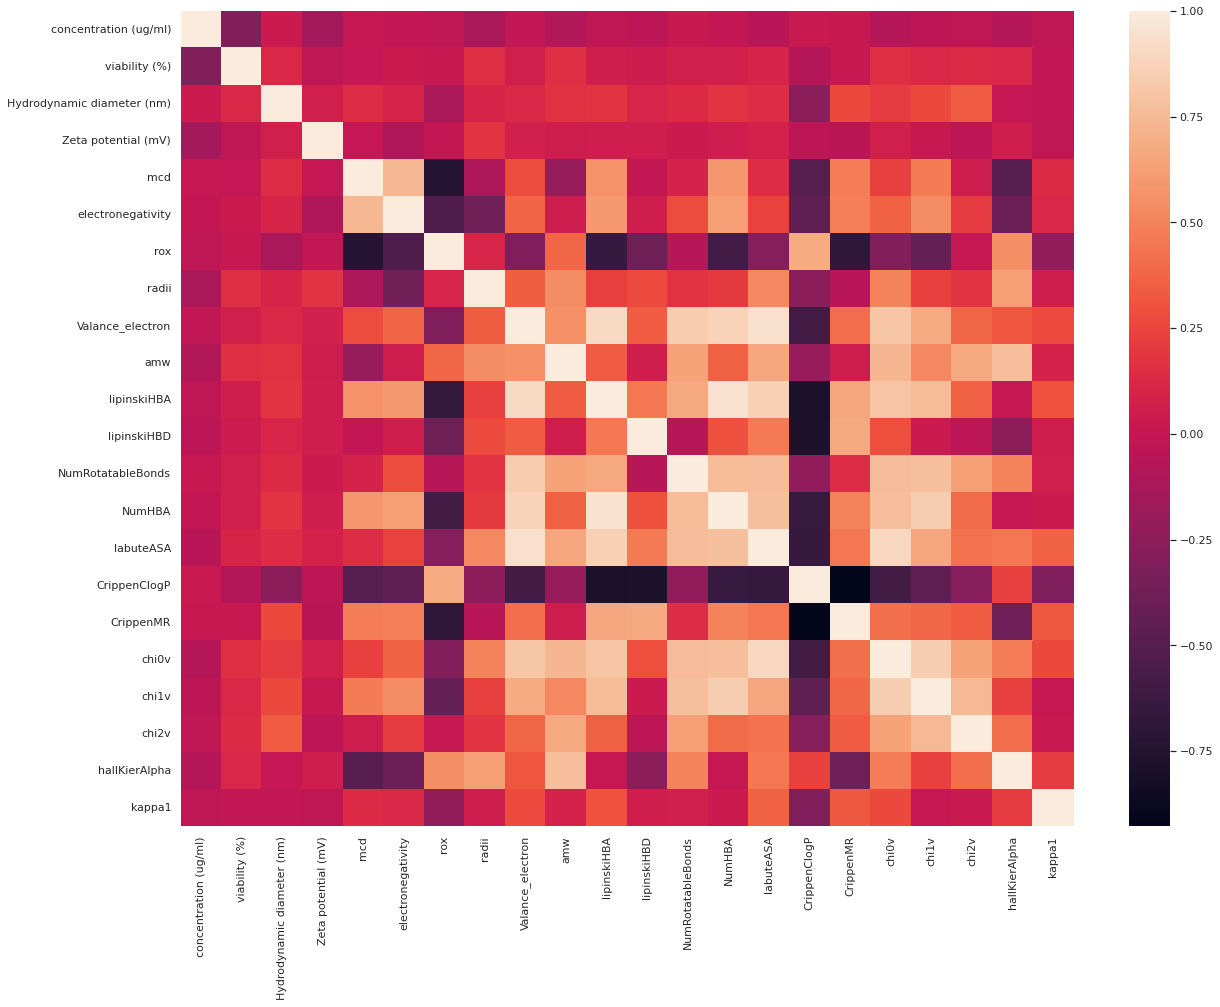

In [ ]:
sns.heatmap(df6.corr())
sns.set(rc={'figure.figsize':(20,15)})

#dataset after feature removal
merge numerical and catergorical values

In [ ]:
df6_all = pd.merge(dff5o, df6, left_index=True, right_index=True)

In [ ]:
# rem = pd.merge(dff, df6, left_index=True, right_index=True)

In [ ]:
# original = df6_all.loc[all['source'] == 'original']
# external = df6_all.loc[all['source']=='external']
# external.columns


In [ ]:
df6.columns

Index(['concentration (ug/ml)', 'viability (%)', 'Hydrodynamic diameter (nm)',
       'Zeta potential (mV)', 'mcd', 'electronegativity', 'rox', 'radii',
       'Valance_electron', 'amw', 'lipinskiHBA', 'lipinskiHBD',
       'NumRotatableBonds', 'NumHBA', 'labuteASA', 'CrippenClogP', 'CrippenMR',
       'chi0v', 'chi1v', 'chi2v', 'hallKierAlpha', 'kappa1'],
      dtype='object')

In [ ]:
df6_all.columns

Index(['cell line', 'test', 'material', 'source', 'organism', 'cell type',
       'morphology', 'tissue', 'disease', 'concentration (ug/ml)',
       'viability (%)', 'Hydrodynamic diameter (nm)', 'Zeta potential (mV)',
       'mcd', 'electronegativity', 'rox', 'radii', 'Valance_electron', 'amw',
       'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBA',
       'labuteASA', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v',
       'hallKierAlpha', 'kappa1'],
      dtype='object')

In [ ]:
label = {'viability (%)'}
num_col = set(df6.columns)
all = set(df6_all.columns)
cat_col = all - num_col - label


In [ ]:
df6_all[cat_col]

,disease,morphology,tissue,cell line,source,organism,cell type,test,material
0,osteosarcoma,mix,bone,143B,original,Human,Human,MTT,Au
1,osteosarcoma,mix,bone,143B,original,Human,Human,MTT,Au
2,osteosarcoma,mix,bone,143B,original,Human,Human,MTT,Au
3,osteosarcoma,mix,bone,143B,original,Human,Human,MTT,Au
4,osteosarcoma,mix,bone,143B,original,Human,Human,MTT,Au
...,...,...,...,...,...,...,...,...,...
3236,Neuroblastoma,neuroblast,brain,neuro2A,original,mouse,Animal,MTT,CeO2
3237,Neuroblastoma,neuroblast,brain,neuro2A,original,mouse,Animal,MTT,CeO2
3238,Neuroblastoma,neuroblast,brain,neuro2A,original,mouse,Animal,MTT,CeO2
3239,Neuroblastoma,neuroblast,brain,neuro2A,original,mouse,Animal,MTT,CeO2


In [ ]:
df6_all[num_col]

,CrippenMR,CrippenClogP,NumRotatableBonds,Zeta potential (mV),lipinskiHBA,mcd,viability (%),labuteASA,concentration (ug/ml),Valance_electron,...,hallKierAlpha,chi1v,radii,Hydrodynamic diameter (nm),chi0v,rox,chi2v,NumHBA,amw,electronegativity
0,0.000,-0.0025,0.0,-4.65,0.0,0.000000,36.126,23.001881,200.0,11.0,...,0.740260,0.000000,1.35,50.00,2.467977,1.692,0.0,0.0,196.967,2.540000
1,0.000,-0.0025,0.0,-33.33,0.0,0.000000,22.253,23.001881,400.0,11.0,...,0.740260,0.000000,1.35,50.00,2.467977,1.692,0.0,0.0,196.967,2.540000
2,0.000,-0.0025,0.0,-31.30,0.0,0.000000,19.643,23.001881,500.0,11.0,...,0.740260,0.000000,1.35,50.00,2.467977,1.692,0.0,0.0,196.967,2.540000
3,0.000,-0.0025,0.0,-16.95,0.0,0.000000,91.262,23.001881,1.0,11.0,...,0.740260,0.000000,1.35,189.25,2.467977,1.692,0.0,0.0,196.967,2.540000
4,0.000,-0.0025,0.0,29.45,0.0,0.000000,87.500,23.001881,3.0,11.0,...,0.740260,0.000000,1.35,444.90,2.467977,1.692,0.0,0.0,196.967,2.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,1.373,-0.2376,0.0,-40.50,2.0,3.960396,63.246,39.190321,50.0,16.0,...,0.976623,2.972092,1.85,5.00,4.456552,-0.870,0.0,2.0,172.114,2.666667
3237,1.373,-0.2376,0.0,-8.00,2.0,3.960396,102.630,39.190321,50.0,16.0,...,0.976623,2.972092,1.85,10.00,4.456552,-0.870,0.0,2.0,172.114,2.666667
3238,1.373,-0.2376,0.0,31.38,2.0,3.960396,107.880,39.190321,50.0,16.0,...,0.976623,2.972092,1.85,20.00,4.456552,-0.870,0.0,2.0,172.114,2.666667
3239,1.373,-0.2376,0.0,-8.72,2.0,3.960396,106.440,39.190321,50.0,16.0,...,0.976623,2.972092,1.85,40.00,4.456552,-0.870,0.0,2.0,172.114,2.666667


In [ ]:
df6_all.to_csv('preprocessed_data.csv')

In [ ]:
preprocessed = df6_all.copy()

In [ ]:
preprocessed = preprocessed.reset_index(drop=True)

In [ ]:
preprocessed

,cell line,test,material,source,organism,cell type,morphology,tissue,disease,concentration (ug/ml),...,NumRotatableBonds,NumHBA,labuteASA,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,hallKierAlpha,kappa1
0,143B,MTT,Au,original,Human,Human,mix,bone,osteosarcoma,200.0,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
1,143B,MTT,Au,original,Human,Human,mix,bone,osteosarcoma,400.0,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
2,143B,MTT,Au,original,Human,Human,mix,bone,osteosarcoma,500.0,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
3,143B,MTT,Au,original,Human,Human,mix,bone,osteosarcoma,1.0,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
4,143B,MTT,Au,original,Human,Human,mix,bone,osteosarcoma,3.0,...,0.0,0.0,23.001881,-0.0025,0.000,2.467977,0.000000,0.0,0.740260,1.740260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,neuro2A,MTT,CeO2,original,mouse,Animal,neuroblast,brain,Neuroblastoma,50.0,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623
3114,neuro2A,MTT,CeO2,original,mouse,Animal,neuroblast,brain,Neuroblastoma,50.0,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623
3115,neuro2A,MTT,CeO2,original,mouse,Animal,neuroblast,brain,Neuroblastoma,50.0,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623
3116,neuro2A,MTT,CeO2,original,mouse,Animal,neuroblast,brain,Neuroblastoma,50.0,...,0.0,2.0,39.190321,-0.2376,1.373,4.456552,2.972092,0.0,0.976623,3.976623


##Standard scaler and Ordinal encoding on original and external data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(df6_all[cat_col])
X_c = oe.transform(df6_all[cat_col])
# Xval_c = oe.transform(Xvalcat_col)
X_c = pd.DataFrame(X_c, columns=cat_col)
# Xval_c = pd.DataFrame(Xval_c, columns=Xvalcat_col.columns)



In [ ]:
X_c

,disease,morphology,tissue,cell line,source,organism,cell type,test,material
0,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0
1,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0
2,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0
3,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0
4,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...
3113,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0
3114,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0
3115,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0
3116,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0


In [ ]:
df6_num = df6_all[num_col].reset_index(drop=True)

In [ ]:
X_s = df6_num.drop(['viability (%)'], axis=1)
Y = preprocessed[['viability (%)']].copy()

In [ ]:
Y

,viability (%)
0,36.126
1,22.253
2,19.643
3,91.262
4,87.500
...,...
3113,63.246
3114,102.630
3115,107.880
3116,106.440


In [ ]:
X_s

,CrippenMR,CrippenClogP,NumRotatableBonds,Zeta potential (mV),lipinskiHBA,mcd,labuteASA,concentration (ug/ml),Valance_electron,kappa1,...,hallKierAlpha,chi1v,radii,Hydrodynamic diameter (nm),chi0v,rox,chi2v,NumHBA,amw,electronegativity
0,0.000,-0.0025,0.0,-4.65,0.0,0.000000,23.001881,200.0,11.0,1.740260,...,0.740260,0.000000,1.35,50.00,2.467977,1.692,0.0,0.0,196.967,2.540000
1,0.000,-0.0025,0.0,-33.33,0.0,0.000000,23.001881,400.0,11.0,1.740260,...,0.740260,0.000000,1.35,50.00,2.467977,1.692,0.0,0.0,196.967,2.540000
2,0.000,-0.0025,0.0,-31.30,0.0,0.000000,23.001881,500.0,11.0,1.740260,...,0.740260,0.000000,1.35,50.00,2.467977,1.692,0.0,0.0,196.967,2.540000
3,0.000,-0.0025,0.0,-16.95,0.0,0.000000,23.001881,1.0,11.0,1.740260,...,0.740260,0.000000,1.35,189.25,2.467977,1.692,0.0,0.0,196.967,2.540000
4,0.000,-0.0025,0.0,29.45,0.0,0.000000,23.001881,3.0,11.0,1.740260,...,0.740260,0.000000,1.35,444.90,2.467977,1.692,0.0,0.0,196.967,2.540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,1.373,-0.2376,0.0,-40.50,2.0,3.960396,39.190321,50.0,16.0,3.976623,...,0.976623,2.972092,1.85,5.00,4.456552,-0.870,0.0,2.0,172.114,2.666667
3114,1.373,-0.2376,0.0,-8.00,2.0,3.960396,39.190321,50.0,16.0,3.976623,...,0.976623,2.972092,1.85,10.00,4.456552,-0.870,0.0,2.0,172.114,2.666667
3115,1.373,-0.2376,0.0,31.38,2.0,3.960396,39.190321,50.0,16.0,3.976623,...,0.976623,2.972092,1.85,20.00,4.456552,-0.870,0.0,2.0,172.114,2.666667
3116,1.373,-0.2376,0.0,-8.72,2.0,3.960396,39.190321,50.0,16.0,3.976623,...,0.976623,2.972092,1.85,40.00,4.456552,-0.870,0.0,2.0,172.114,2.666667


standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_all = sc.fit_transform(X_s)
X_ss = sc.transform(X_s)
X_sc = pd.DataFrame(X_ss, columns=X_s.columns, index =X_s.index)
X_sc


,CrippenMR,CrippenClogP,NumRotatableBonds,Zeta potential (mV),lipinskiHBA,mcd,labuteASA,concentration (ug/ml),Valance_electron,kappa1,...,hallKierAlpha,chi1v,radii,Hydrodynamic diameter (nm),chi0v,rox,chi2v,NumHBA,amw,electronegativity
0,-0.690233,0.578920,-0.402656,-0.019203,-0.840846,-0.870061,-0.299167,0.682045,-0.453210,-0.201985,...,0.671398,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
1,-0.690233,0.578920,-0.402656,-0.837357,-0.840846,-0.870061,-0.299167,1.926137,-0.453210,-0.201985,...,0.671398,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
2,-0.690233,0.578920,-0.402656,-0.779447,-0.840846,-0.870061,-0.299167,2.548183,-0.453210,-0.201985,...,0.671398,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
3,-0.690233,0.578920,-0.402656,-0.370085,-0.840846,-0.870061,-0.299167,-0.555827,-0.453210,-0.201985,...,0.671398,-0.776575,0.156502,1.048944,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
4,-0.690233,0.578920,-0.402656,0.953567,-0.840846,-0.870061,-0.299167,-0.543386,-0.453210,-0.201985,...,0.671398,-0.776575,0.156502,3.406557,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,-0.367618,0.059477,-0.402656,-1.041895,0.451616,0.638891,0.665089,-0.251024,-0.084791,-0.103210,...,1.251884,1.580455,2.023985,-0.650217,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031
3114,-0.367618,0.059477,-0.402656,-0.114768,0.451616,0.638891,0.665089,-0.251024,-0.084791,-0.103210,...,1.251884,1.580455,2.023985,-0.604106,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031
3115,-0.367618,0.059477,-0.402656,1.008624,0.451616,0.638891,0.665089,-0.251024,-0.084791,-0.103210,...,1.251884,1.580455,2.023985,-0.511886,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031
3116,-0.367618,0.059477,-0.402656,-0.135308,0.451616,0.638891,0.665089,-0.251024,-0.084791,-0.103210,...,1.251884,1.580455,2.023985,-0.327445,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031


Scaled and normalized dataset


In [ ]:
X = pd.merge(X_c, X_sc, right_index=True, left_index=True) 
X

,disease,morphology,tissue,cell line,source,organism,cell type,test,material,CrippenMR,...,hallKierAlpha,chi1v,radii,Hydrodynamic diameter (nm),chi0v,rox,chi2v,NumHBA,amw,electronegativity
0,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,0.671398,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
1,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,0.671398,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
2,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,0.671398,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
3,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,0.671398,-0.776575,0.156502,1.048944,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
4,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,0.671398,-0.776575,0.156502,3.406557,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.251884,1.580455,2.023985,-0.650217,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031
3114,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.251884,1.580455,2.023985,-0.604106,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031
3115,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.251884,1.580455,2.023985,-0.511886,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031
3116,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.251884,1.580455,2.023985,-0.327445,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031


In [ ]:
dataf = pd.concat([X, Y], axis=1)

In [ ]:
dataf

,disease,morphology,tissue,cell line,source,organism,cell type,test,material,CrippenMR,...,chi1v,radii,Hydrodynamic diameter (nm),chi0v,rox,chi2v,NumHBA,amw,electronegativity,viability (%)
0,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001,36.126
1,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001,22.253
2,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,-0.776575,0.156502,-0.235225,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001,19.643
3,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,-0.776575,0.156502,1.048944,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001,91.262
4,11.0,8.0,4.0,0.0,1.0,0.0,1.0,10.0,2.0,-0.690233,...,-0.776575,0.156502,3.406557,-0.266917,1.525767,-0.251481,-0.845965,0.841774,-0.039001,87.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.580455,2.023985,-0.650217,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031,63.246
3114,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.580455,2.023985,-0.604106,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031,102.630
3115,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.580455,2.023985,-0.511886,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031,107.880
3116,2.0,11.0,5.0,73.0,1.0,4.0,0.0,10.0,6.0,-0.367618,...,1.580455,2.023985,-0.327445,0.825854,-0.782324,-0.251481,0.558945,0.547122,0.374031,106.440


##split original and external dataset

In [ ]:
original = dataf[dataf['source']== 1.0]
external = dataf[dataf['source']== 0]


In [ ]:
ori = original.drop(['source'], axis=1)
ext = external.drop(['source'], axis=1)

In [ ]:
ori.to_csv('scaled_original_material_cell.csv')
ext.to_csv('scaled_external_material_cell.csv')


In [ ]:
X = original.drop('viability (%)', axis=1)
X = X.drop('source', axis=1)
Y = original[['viability (%)']].copy()
X_val = external.drop('viability (%)', axis=1)
X_val = X_val.drop('source', axis=1)
Y_val = external[['viability (%)']].copy()

In [ ]:
Y

,viability (%)
0,36.126
1,22.253
2,19.643
3,91.262
4,87.500
...,...
3113,63.246
3114,102.630
3115,107.880
3116,106.440


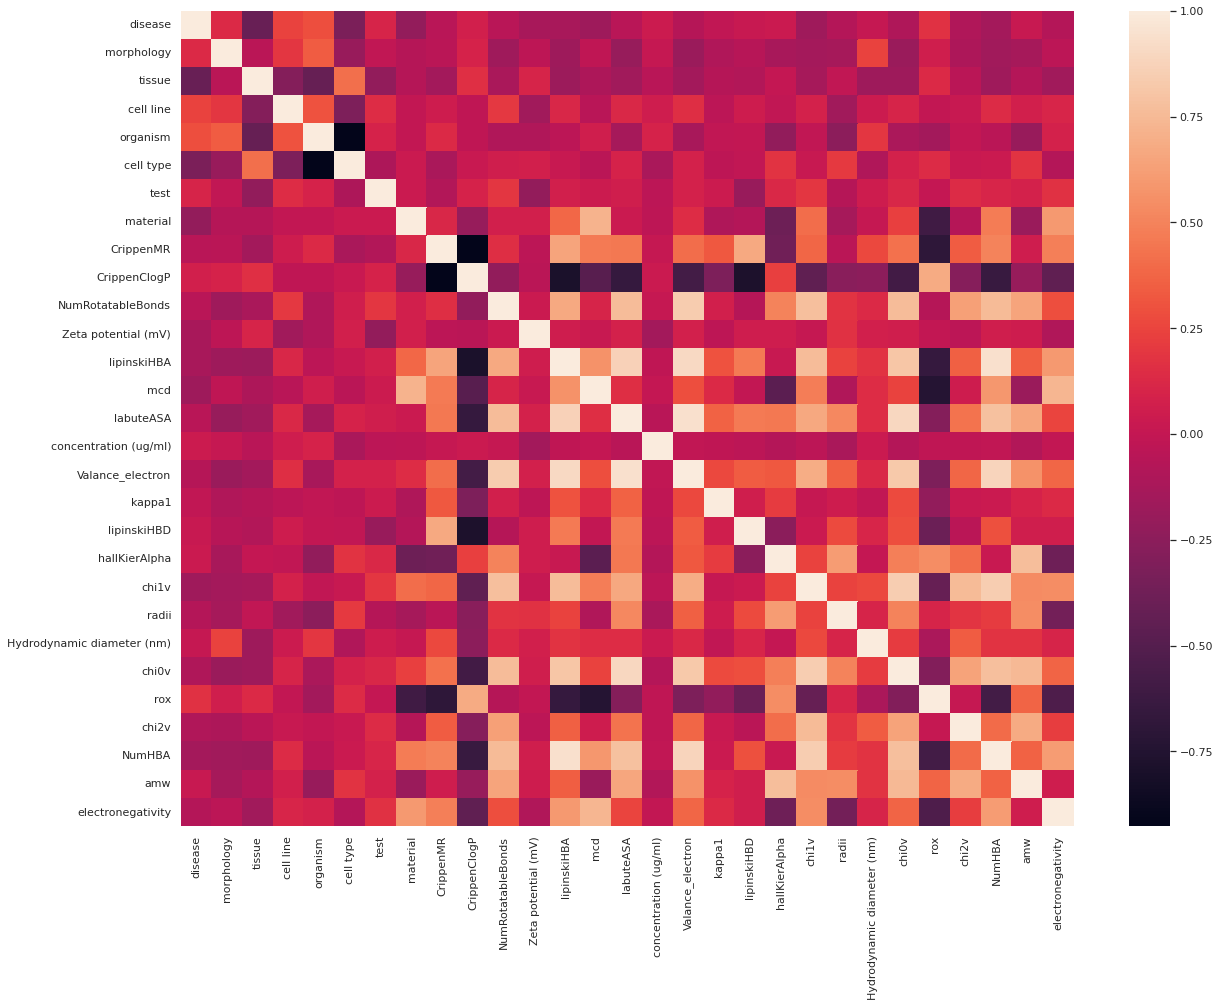

In [ ]:
sns.heatmap(X.corr())